# Perrin Freres Monthly Champagne Sales Forecast
### Objective
Create a time-series model to forecast the sales values for Perrin Freres Champagne for the next 12 months in the future

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [3]:
# preview dataset
df.head()

,Month,\tPerrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,\tPerrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
# drop last 2 rows
df.drop(df.tail(2).index, inplace=True)

In [6]:
df.tail()

,Month,\tPerrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
# shape of dataset
print("# Rows : ", df.shape[0])
print("# Cols : ", df.shape[1])

# Rows :  105
# Cols :  2


In [8]:
# metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
Month                                                      105 non-null object
	Perrin Freres monthly champagne sales millions ?64-?72    105 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [9]:
# check for null values
df.isnull().sum()

Month                                                       0
\tPerrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

- there are no null values in the missing dataset

In [10]:
# prepare the dataset
df.columns = ['ds','y']  # update feature name
df['ds'] = pd.to_datetime(df['ds'])  # update feature datatype
df['ds'].freq = 'MS'  # set frequency

In [12]:
# preview dataset
df.head()

,ds,y
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [13]:
# metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
ds    105 non-null datetime64[ns]
y     105 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


# Visualize Dataset

Text(0,0.5,'Sales (in million USD)')

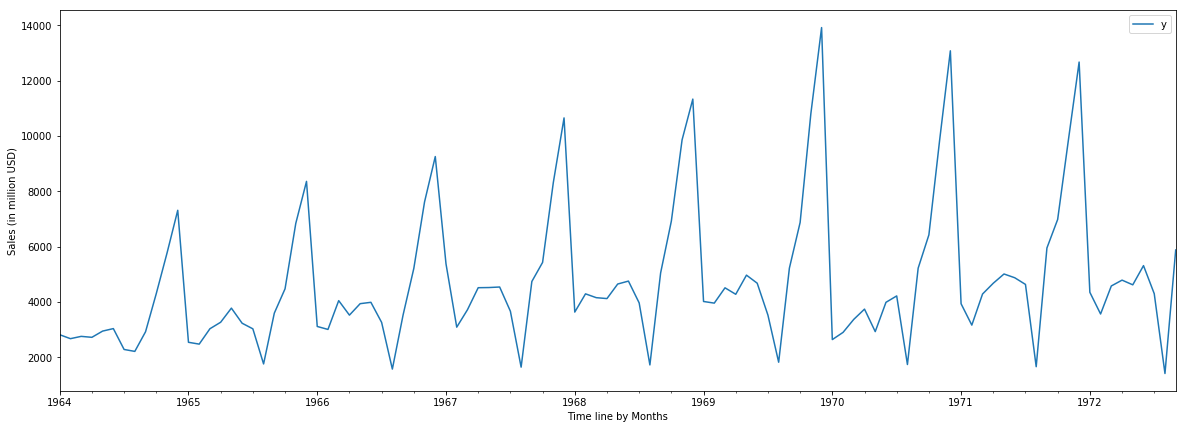

In [14]:
df.plot(x='ds', y='y', figsize=(20,7))
plt.xlabel('Time line by Months')
plt.ylabel('Sales (in million USD)')

- Seasonality can be observed every 12 months
- There is a upwards trend
- The dataset does not seem to be stationary

# Modelling - FbProphet

In [15]:
# import forecast libraries and packages
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


In [16]:
# modelling
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
# create placeholder to store forecast values
future = m.make_future_dataframe(periods = 60)

# forecast
forecast = m.predict(future)

In [59]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1964-01-01,3458.475053,1336.476020,3254.014678,3458.475053,3458.475053,-1113.259384,-1113.259384,-1113.259384,-1113.259384,-1113.259384,-1113.259384,0.0,0.0,0.0,2345.215668
1,1964-02-01,3490.436774,872.634329,2837.641437,3490.436774,3490.436774,-1600.336356,-1600.336356,-1600.336356,-1600.336356,-1600.336356,-1600.336356,0.0,0.0,0.0,1890.100418
2,1964-03-01,3520.336449,1798.012587,3675.261407,3520.336449,3520.336449,-787.089069,-787.089069,-787.089069,-787.089069,-787.089069,-787.089069,0.0,0.0,0.0,2733.247380
3,1964-04-01,3552.298171,1684.141758,3630.683629,3552.298171,3552.298171,-948.610358,-948.610358,-948.610358,-948.610358,-948.610358,-948.610358,0.0,0.0,0.0,2603.687813
4,1964-05-01,3583.228868,1828.142966,3775.876531,3583.228868,3583.228868,-747.055615,-747.055615,-747.055615,-747.055615,-747.055615,-747.055615,0.0,0.0,0.0,2836.173253
5,1964-06-01,3615.190588,1991.223431,3843.939201,3615.190588,3615.190588,-627.738981,-627.738981,-627.738981,-627.738981,-627.738981,-627.738981,0.0,0.0,0.0,2987.451607
6,1964-07-01,3646.121286,1249.396051,3106.784692,3646.121286,3646.121286,-1451.706626,-1451.706626,-1451.706626,-1451.706626,-1451.706626,-1451.706626,0.0,0.0,0.0,2194.414660
7,1964-08-01,3678.083006,-338.206986,1602.437627,3678.083006,3678.083006,-2988.178306,-2988.178306,-2988.178306,-2988.178306,-2988.178306,-2988.178306,0.0,0.0,0.0,689.904701
8,1964-09-01,3710.044727,2416.418665,4286.208424,3710.044727,3710.044727,-329.191624,-329.191624,-329.191624,-329.191624,-329.191624,-329.191624,0.0,0.0,0.0,3380.853102
9,1964-10-01,3740.975424,3981.174007,5811.176215,3740.975424,3740.975424,1207.239362,1207.239362,1207.239362,1207.239362,1207.239362,1207.239362,0.0,0.0,0.0,4948.214786


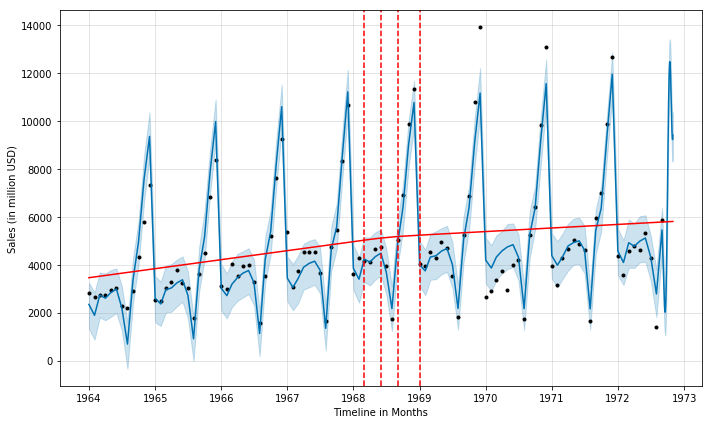

In [60]:
# plot the data with forecasted predictions
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast, xlabel='Timeline in Months', ylabel='Sales (in million USD)')
a = add_changepoints_to_plot(fig.gca(), m, forecast)